In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Simulated dataset
data = {
    'Size_sqft': [850, 900, 1000, 1200, 1500, 1700, 2000, 2200, 2500, 2800],
    'Bedrooms': [2, 2, 3, 3, 3, 4, 4, 4, 5, 5],
    'Age_yrs': [10, 5, 8, 6, 12, 7, 3, 4, 2, 1],
    'Price_ksh': [2.3, 2.7, 3.2, 3.8, 4.1, 4.8, 5.5, 5.9, 6.2, 6.8]
}
df = pd.DataFrame(data)
df


,Size_sqft,Bedrooms,Age_yrs,Price_ksh
0,850,2,10,2.3
1,900,2,5,2.7
2,1000,3,8,3.2
3,1200,3,6,3.8
4,1500,3,12,4.1
5,1700,4,7,4.8
6,2000,4,3,5.5
7,2200,4,4,5.9
8,2500,5,2,6.2
9,2800,5,1,6.8


In [3]:
X = df[['Size_sqft', 'Bedrooms', 'Age_yrs']]
y = df['Price_ksh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [5]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Compare actual vs predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)


Mean Squared Error: 0.07685084405700311
R² Score: 0.9628540495965077
   Actual  Predicted
8     6.2   6.663221
1     2.7   2.630374
5     4.8   4.905505


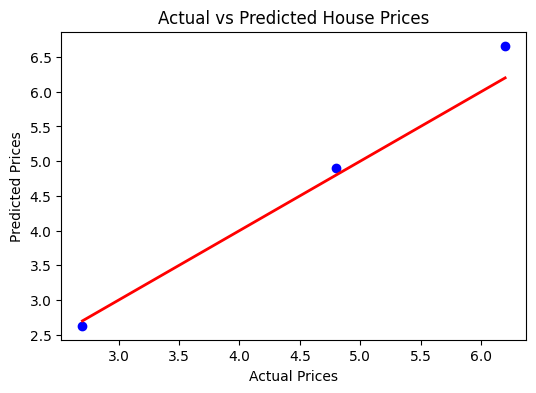

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [7]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
rf_model = RandomForestRegressor(
    n_estimators=100,      # number of trees
    random_state=42        # for reproducibility
)
rf_model.fit(X_train, y_train)
print("Random Forest model trained successfully!")


Random Forest model trained successfully!


In [8]:
rf_pred = rf_model.predict(X_test)

print("Random Forest Results:")
print("Mean Squared Error:", mean_squared_error(y_test, rf_pred))
print("R² Score:", r2_score(y_test, rf_pred))

results_rf = pd.DataFrame({
    'Actual': y_test,
    'Predicted_RF': rf_pred,
    'Predicted_Linear': y_pred  # from the earlier model
})
print(results_rf)


Random Forest Results:
Mean Squared Error: 0.2796970000000005
R² Score: 0.8648081095596131
   Actual  Predicted_RF  Predicted_Linear
8     6.2         6.261          6.663221
1     2.7         3.571          2.630374
5     4.8         4.523          4.905505


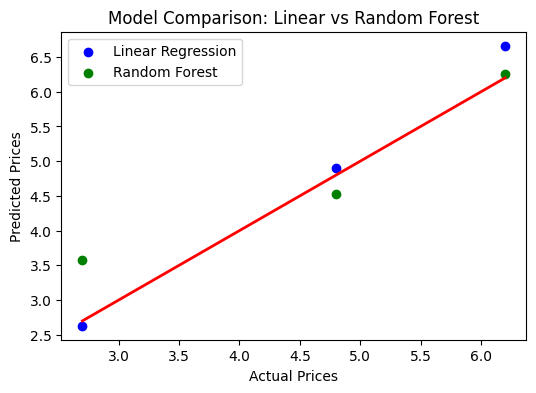

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue', label='Linear Regression')
plt.scatter(y_test, rf_pred, color='green', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Model Comparison: Linear vs Random Forest")
plt.legend()
plt.show()


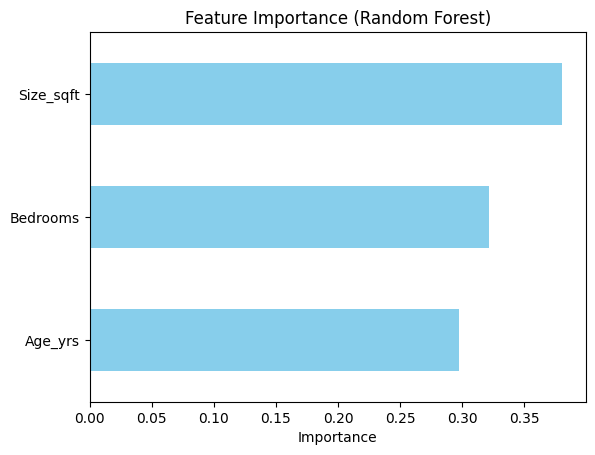

In [10]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.show()


In [11]:
from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# View first few rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('MedHouseVal', axis=1)  # features
y = df['MedHouseVal']               # target (median house value)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.2553684927247781
R² Score: 0.8051230593157366


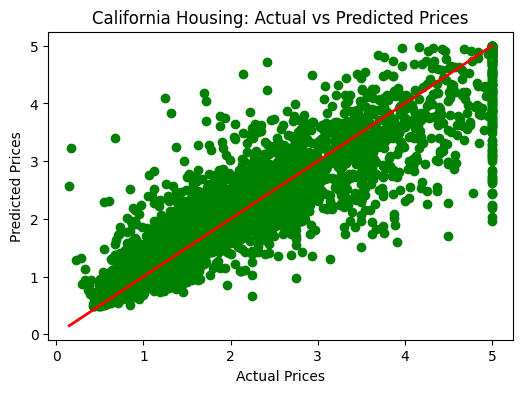

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("California Housing: Actual vs Predicted Prices")
plt.show()


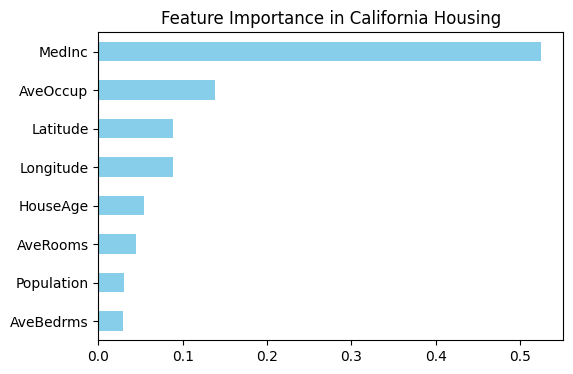

In [16]:
import pandas as pd

importance = pd.Series(rf_model.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh', color='skyblue', figsize=(6,4))
plt.title("Feature Importance in California Housing")
plt.show()
